In [23]:
import os
import graphviz
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from utils import svm_to_csv

SVM_MODEL_CSV = os.path.join("./", "support_vector_machine_mfcc.csv")

### Extract the dataset from the .au csv files

In [24]:
print("Extracting dataset training set...")
dataset = '../../datasets/music_features_mfcc_train.csv'
musics_df = pd.read_csv(dataset, header=0)
# Get all style values
Y_train = musics_df["style"].values
# Get all features names
features_name = musics_df.columns.values[:-2]
# Get all features values
# musics_df = musics_df.drop('style', axis=1)
# musics_df = musics_df.drop('file_name', axis=1)
# X = musics_df.values
X_train = musics_df.loc[:, ~musics_df.columns.isin(['style', 'file_name'])].values
unique_label_names = np.unique(Y_train)

print("File contains {} unique_label_names: ".format(len(unique_label_names), unique_label_names))
print("File contains {} lines of {} data ".format(X_train.shape[0], X_train.shape[1]))

print("Extracting dataset testing set...")
dataset = '../../datasets/music_features_mfcc_test.csv'
musics_df = pd.read_csv(dataset, header=0)
# Get all style values
Y_test = musics_df["style"].values
# Get all features names
features_name = musics_df.columns.values[:-2]
# Get all features values
# musics_df = musics_df.drop('style', axis=1)
# musics_df = musics_df.drop('file_name', axis=1)
# X = musics_df.values
X_test = musics_df.loc[:, ~musics_df.columns.isin(['style', 'file_name'])].values
unique_label_names = np.unique(Y_test)

print("File contains {} unique_label_names: ".format(len(unique_label_names), unique_label_names))
print("File contains {} lines of {} data ".format(X_test.shape[0], X_test.shape[1]))

Extracting dataset training set...
File contains 10 unique_label_names: 
File contains 799 lines of 42 data 
Extracting dataset testing set...
File contains 10 unique_label_names: 
File contains 201 lines of 42 data 


# Support Vector Machine (using linear kernel)

### Optimize model using Grid search and cross validation

In [25]:
print("Creating Support Vector Machine model...")
svm_model = SVC()

print("Training Support Vector Machine model using grid search and cross validation...")
C_list = list(np.arange(0.1, 75, 0.05))
param_grid = dict(kernel=['linear'], C=C_list)

svm_model = GridSearchCV(svm_model, param_grid, cv=5, verbose=2, n_jobs=os.cpu_count()-1)
t_start = time()
svm_model.fit(X_train, Y_train)
print("Training done in {}s".format(time()-t_start))

svm_model_best_estimator = svm_model.best_estimator_
print("Support Vector Machine best estimator found using grid search: {}".format(svm_model_best_estimator))


Creating Support Vector Machine model...
Training Support Vector Machine model using grid search and cross validation...
Fitting 5 folds for each of 1498 candidates, totalling 7490 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............C=0.15000000000000002, kernel=linear; total time=   0.2s[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s

[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.2s
[CV] END ...............C=0.15000000000000002, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............C=0.15000000000000002, kernel=linear; total time=   0.1s
[CV] END ...............C=0.15000000000000002, kernel=linear; total time=   0.1s[CV] END ...............C=0.20000000000000004, kernel=linear; total time=   0.1s

[CV]

### Create the final model using the best estimator found

Creating final Support Vector Machine model...
Training final Support Vector Machine model...
	training done in 0.03782916069030762s
Testing final Support Vector Machine model...
              precision    recall  f1-score   support

       blues       0.78      0.86      0.82        21
   classical       1.00      0.95      0.97        20
     country       0.71      0.85      0.77        20
       disco       0.52      0.65      0.58        20
      hiphop       0.62      0.40      0.48        20
        jazz       0.93      0.70      0.80        20
       metal       0.85      0.85      0.85        20
         pop       0.74      0.70      0.72        20
      reggae       0.68      0.75      0.71        20
        rock       0.38      0.40      0.39        20

    accuracy                           0.71       201
   macro avg       0.72      0.71      0.71       201
weighted avg       0.72      0.71      0.71       201



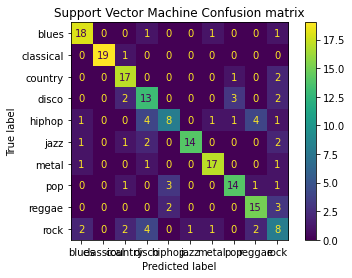

In [26]:
print("Creating final Support Vector Machine model...")
svm_model = svm_model_best_estimator
print("Training final Support Vector Machine model...")
t_start = time()
svm_model.fit(X_train,Y_train)
print("\ttraining done in {}s".format(time()-t_start))

print("Testing final Support Vector Machine model...")
preds_valid=svm_model.predict(X_test)

# Metrics off the dataset
print(classification_report(Y_test, preds_valid, target_names=unique_label_names))
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, preds_valid, display_labels=unique_label_names)
plt.title("Support Vector Machine Confusion matrix")
plt.show()
# plot_confusion_matrix(y_test_index, preds_valid_id, classes=unique_label_names, title='Support Vector Machine Confusion matrix')

### Export model to csv file

In [27]:
CSV_HEADER = svm_to_csv(svm_model, class_names=unique_label_names, csv_file=SVM_MODEL_CSV)

print("CSV file  path: {}".format(SVM_MODEL_CSV))
print("CSV file  header: {}".format(CSV_HEADER))

CSV file  path: ./support_vector_machine_mfcc.csv
CSV file  header: ['positive_class', 'negative_class', 'intercept', 'coeff0', 'coeff1', 'coeff2', 'coeff3', 'coeff4', 'coeff5', 'coeff6', 'coeff7', 'coeff8', 'coeff9', 'coeff10', 'coeff11', 'coeff12', 'coeff13', 'coeff14', 'coeff15', 'coeff16', 'coeff17', 'coeff18', 'coeff19', 'coeff20', 'coeff21', 'coeff22', 'coeff23', 'coeff24', 'coeff25', 'coeff26', 'coeff27', 'coeff28', 'coeff29', 'coeff30', 'coeff31', 'coeff32', 'coeff33', 'coeff34', 'coeff35', 'coeff36', 'coeff37', 'coeff38', 'coeff39', 'coeff40', 'coeff41']
